# Project Update
### 2019-03-19

## Calculating thermal time indices and merging UAV data.

**Name**: Byron Evers<br/>
**Semester**: Spring 2019 <br/>
**Project area**: Agronomy

## Table of contents
1. [Objective](#Update_Objective)
2. [Motivation](#Update_Motivation)
3. [Equations](#Update_Equations)
    * [GDD](#Update_GDD)
    * [Pdays](#Update_Pdays)
    * [BMT](#Update_BMT)
4. [Progress](#Update_Progress)
5. [Road Blocks](#Update_Road_Blocks)
6. [Examples](#Update_examples)
    * [Mesonet Input](#Update_inputs)
    * [GDD Function](#Update_function)
    * [Data Frame Output](#Update_output)
    * [Graph](#Update_graph)


<a name="Update_Objective"></a>
## Objective

1. Write a python function to calculate three thermal time indices for all UAV collection dates
    * growing degree days (GDD)
    * physiological days (Pdays)
    * biometeorological time (BMT) 
2. Merge all of the UAV reflectance data, plot level phenotypic data and the calculated thermal values into one .csv file.


<img src="diagram.png" alt="sketch_image" width="1000"/>

<a name="Update_Motivation"></a>
## Motivation
- Poland labs current UAV pipeline includes stitching photos and extracting plot level reflectance data through Agisoft software.
    * 2017 Data is 
- Data recived from this process is in either an Excel or csv file. 
- The data set includes reflectance values for 5 indiviual bands (R,G,B,RE and NIR) and 3 vegitative indices (NDVI, NDRE and GNDVI). 
- Thermal time indices are important for data analysis between years
- Comparing thermal time indices maybe usefull in plots with diverse germplasm

<a name="Update_Equations"></a>
## Equations


<a name="Update_GDD"></a>
### Growing Degree Days (GDD):
$$GDD = \sum_{Planting}^{Harvest}(\frac{Tmax+Tmin}{2})-Tbase$$

<a name="Update_Pdays"></a>
### Physological Days (Pdays):
$$Pdays = \frac{1}{24}(5*P(T_1)+8*P(T_2)+8*P(T_3)+3*P(T_4))$$
**Where**
* $T_1=Tmin$
* $T_2=\frac{(2*Tmin)+Tmax}{3}$
* $T_3=\frac{Tmin+(2*Tmax)}{3}$
* $T_4=Tmax$

**And P is**
* $P=0$   When $T <=Tmin$
* $P=k*(1-\frac{(T-Topt)2}{(Topt-Tmin)2})$ when $Tmin <= T <=Topt$
* $P=k*(1-\frac{(T-Topt)2}{(Tmax-Topt)2})$ when $Topt <= T <=Tmax$
* $P=0$ when $T >=Tmax$


<a name="Update_BMT"></a>
### Biometeorological Time
$$BMT = \sum_{Planting}^{Harvest}[a_1(L-a_0) + a_2(L-a_0)^2]* {[b_1(L-b_0) + b_2(L-b_0)^2]}*{[d_1(L-b_0) + d_2(L-b_0)^2]}$$
**Where**
* $L$= daily photoperiod
* $a_0$= base daylength
* $b_0$= base temperature
* $a_1, a_2, b_1, b_2, d_1, d_2$ are response coefficents 

<a name="Update_Progress"></a>
## Progress
- [X] Downloaded data from KSU Mesonet as a csv
- [X] Defined and imported needed modules
- [X] Imported data as a pands dataframe
- [X] Edited the dataframe
- Define user inputs needed for the cacluations and provide and place to enter
    * [X] <span style="color:green">Planting Date</span>
    * [X] <span style="color:green">Harvest Date</span>
    * [X] <span style="color:green">tbase</span>
    * [X] <span style="color:green">topt</span>
    * [X] <span style="color:green">tmax</span>
- Define function for:
    * [X] <span style="color:green">Pdays</span>
    * [ ] <span style="color:red">Pdays</span>
    * [ ] <span style="color:red">BMT</span>
- Visulize GDD with matplotlib. Include biophysical thermal time predictors
    * [X] <span style="color:green">Tillering</span>
    * [X] <span style="color:green">Flowering</span>
    * [X] <span style="color:green">Grain Fill</span>
    
    


<a name="Update_Road_Blocks"></a>
## Road Blocks
- Pdays how to incorperate two conditions (ie 5<x<17)
- Source data and how to incorperate photoperiod 
- Importing UAV data from Excel particularly multiple tabs
- Formating UAV csv data from a table format to a database format
- Importing all csv files from single working directory and joining them on a common column

<a name="Update_examples"></a>
## Examples

In [10]:
import pandas as pd
import numpy as np
import glob
import datetime as dt
from datetime import datetime
import matplotlib.pyplot as plt
#import matplotlib.pyplot as plt
%matplotlib inline
dirname = '/Users/bevers/Desktop/Coding/Project_Update/Data/'
filename_17 = '2017_growing_season.txt'

<a name="Update_inputs"></a>
## Mesonet Input

In [15]:
df17 = pd.read_csv(dirname + filename_17)
df17.head(5)

,Timestamp,Station,AirTemperature,AirTemperature.1,RelativeHumidity,Precipitation,WindSpeed2m,WindSpeed2m.1,SoilTemperature5cm,SoilTemperature5cm.1,SoilTemperature10cm,SoilTemperature10cm.1,SolarRadiation,ETo,ETo.1
0,NaN,NaN,max,min,avg,total,avg,max,max,min,max,min,total,grass,alfalfa
1,NaN,NaN,°C,°C,%,mm,m/s,m/s,°C,°C,°C,°C,MJ/m²,mm,mm
2,2016-09-01,Scandia,26.3,12.8,76.2,0,1.0,4.9,22.8,13.5,24.9,18.1,22.5,3.92,4.54
3,2016-09-02,Scandia,24.8,13.9,74.2,0,1.8,6.5,21.4,13.3,23.9,17.9,21.4,3.97,4.85
4,2016-09-03,Scandia,26.5,15.4,76.4,8.64,2.5,7.9,19.5,13.6,22.5,18.2,9.2,2.79,3.75


In [16]:
df17.rename(columns={'Timestamp':'Date', 'AirTemperature':'Tmax', 'AirTemperature.1':'Tmin'}, inplace=True)
df17 = df17.drop((df17.index[:2])) # Drop top lines of non numaric data
df17 = df17.drop(['RelativeHumidity', 'Precipitation', 'WindSpeed2m','WindSpeed2m.1','SoilTemperature5cm','SoilTemperature5cm.1',
             'SoilTemperature10cm','SoilTemperature10cm.1','SolarRadiation','ETo','ETo.1'], axis=1)


,Date,Station,Tmax,Tmin
2,2016-09-01,Scandia,26.3,12.8
3,2016-09-02,Scandia,24.8,13.9
4,2016-09-03,Scandia,26.5,15.4
5,2016-09-04,Scandia,29.4,16.8
6,2016-09-05,Scandia,31.5,22.2


<a name="Update_function"></a>
## Define GDD Function

In [17]:
#Define function
def GDD(df):
    """
    Clacluates an individual and cumluative value for GDD for each day in the dataframe
    
    Input: Pandas dataframe. Minimum required columns include:
        T_max= daily maximum temprerature
        T_min= daily minimum temperatrue
        Date = date of collection
        
    Output: Pandas dataframe. In addition the columns in the dataframe input two additional columns will be clclulated and added:
        GDD= The growing degree day value for that individual day
        cum_GDD = The cumlative growing degree day value for all days in the designated growing period.
    
    Byron Evers
    
    2019-03-06
    """
    df.Tmin = df.Tmin.astype(float)
    df.Tmax = df.Tmax.astype(float)
    df.Date =  pd.to_datetime(df.Date,format='%Y-%m-%d')
    df = df.drop(df[df.Date < plantDate].index)
    df = df.drop(df[df.Date > harvestDate].index)
    df['Tbase']=tbase
    df['tavg'] =((df.Tmax+df.Tmin)/2)
    values = np.where(df.tavg < tbase, df.Tbase, df.tavg).astype(float)
    df['GDD']=(values)-df.Tbase
    df['cum_GDD'] = df.GDD.cumsum()
    return df

<a name="Update_output"></a>
## Dataframe Output


In [18]:
plantDate=np.datetime64('2016-10-10') #set the date your crop was planted
harvestDate=np.datetime64('2017-06-30') #set the date your crop was planted
tbase=5 # set the base temperature for your given crop. 
topt=17
tmax=31
k= .35

df17 = GDD(df17)
df17.head(5)

,Date,Station,Tmax,Tmin,Tbase,tavg,GDD,cum_GDD
41,2016-10-10,Scandia,21.3,10.7,5,16.00,11.00,11.00
42,2016-10-11,Scandia,24.4,8.5,5,16.45,11.45,22.45
43,2016-10-12,Scandia,12.2,-0.3,5,5.95,0.95,23.40
44,2016-10-13,Scandia,15.4,-2.5,5,6.45,1.45,24.85
45,2016-10-14,Scandia,21.3,4.6,5,12.95,7.95,32.80


<a name="Update_graph"></a>
## Graph
<img src="2017v2018GDD.png" alt="sketch_image" width="700"/>

/Users/bevers/.local/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


NameError: name 'df18' is not defined

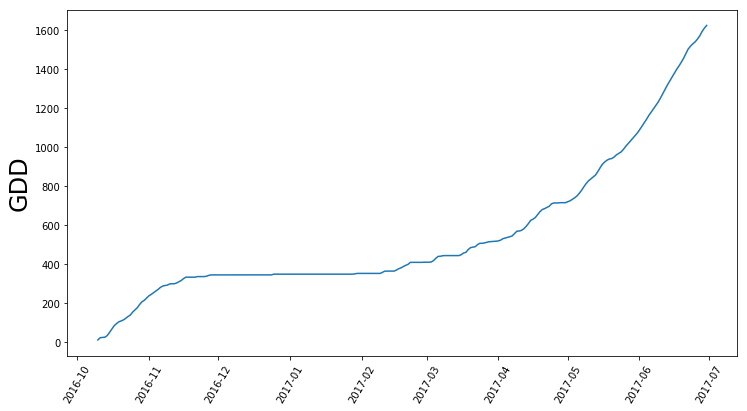

In [19]:
#size plot
plt.figure(figsize=(12,14))


#plot 2017 Data
plt.subplot(2,1,2)
plt.plot(df17.Date,df17.cum_GDD)
plt.ylabel('GDD', fontsize =24)
plt.xticks(rotation=60)

#plot 2018 Data
plt.subplot(2,1,2)
plt.plot(df18.Date,df18.cum_GDD, 'k')
plt.ylabel('GDD', fontsize =24)
plt.xticks(rotation=60)

#plot stage prediction lines
plt.plot(df17.Date, df17.Tillering, '--y')
plt.plot(df17.Date, df17.Flower, '--k')
plt.plot(df17.Date, df17.GrainFill, '--r')
plt.plot(df18.Date, df18.Tillering, '--y')
plt.plot(df18.Date, df18.Flower, '--k')
plt.plot(df18.Date, df18.GrainFill, '--r')


# edit plot
plt.title('GDD Comparison by Year', size=24)

plt.legend(['17-GDD','18-GDD','Tillering Est.','Flowering Est.', 'Grain Fill Est.'], loc=2)
plt.show()